In [1]:
import pandas as pd

In [2]:
johnson = pd.read_csv("johnson.csv")

In [3]:
print(johnson)

                 timestamp  min_power  mean_power  max_power  z_normal
0       2010-04-22 1:00:00        0.0           0          0       NaN
1       2010-04-22 2:00:00        0.0           0          0       NaN
2       2010-04-22 3:00:00        0.0           0          0       NaN
3       2010-04-22 4:00:00        0.0           0          0       NaN
4       2010-04-22 5:00:00        0.0           0          0       NaN
...                    ...        ...         ...        ...       ...
92899  2020-12-31 20:00:00        0.0           0          0       NaN
92900  2020-12-31 21:00:00        0.0           0          0       NaN
92901  2020-12-31 22:00:00        0.0           0          0       NaN
92902  2020-12-31 23:00:00        0.0           0          0       NaN
92903   2020-12-31 0:00:00        0.0           0          0       NaN

[92904 rows x 5 columns]


In [4]:
johnson.dtypes

timestamp      object
min_power     float64
mean_power      int64
max_power       int64
z_normal      float64
dtype: object

In [5]:
print(type(johnson['timestamp'][0]))

<class 'str'>


In [6]:
from datetime import datetime

In [7]:
johnson['timestamp'] = pd.to_datetime(johnson['timestamp'])

In [8]:
print(johnson)

                timestamp  min_power  mean_power  max_power  z_normal
0     2010-04-22 01:00:00        0.0           0          0       NaN
1     2010-04-22 02:00:00        0.0           0          0       NaN
2     2010-04-22 03:00:00        0.0           0          0       NaN
3     2010-04-22 04:00:00        0.0           0          0       NaN
4     2010-04-22 05:00:00        0.0           0          0       NaN
...                   ...        ...         ...        ...       ...
92899 2020-12-31 20:00:00        0.0           0          0       NaN
92900 2020-12-31 21:00:00        0.0           0          0       NaN
92901 2020-12-31 22:00:00        0.0           0          0       NaN
92902 2020-12-31 23:00:00        0.0           0          0       NaN
92903 2020-12-31 00:00:00        0.0           0          0       NaN

[92904 rows x 5 columns]


In [9]:
johnson.dtypes

timestamp     datetime64[ns]
min_power            float64
mean_power             int64
max_power              int64
z_normal             float64
dtype: object

In [10]:
new_df = johnson

In [11]:
new_df

,timestamp,min_power,mean_power,max_power,z_normal
0,2010-04-22 01:00:00,0.0,0,0,NaN
1,2010-04-22 02:00:00,0.0,0,0,NaN
2,2010-04-22 03:00:00,0.0,0,0,NaN
3,2010-04-22 04:00:00,0.0,0,0,NaN
4,2010-04-22 05:00:00,0.0,0,0,NaN
...,...,...,...,...,...
92899,2020-12-31 20:00:00,0.0,0,0,NaN
92900,2020-12-31 21:00:00,0.0,0,0,NaN
92901,2020-12-31 22:00:00,0.0,0,0,NaN
92902,2020-12-31 23:00:00,0.0,0,0,NaN


In [12]:
new_df.dtypes

timestamp     datetime64[ns]
min_power            float64
mean_power             int64
max_power              int64
z_normal             float64
dtype: object

In [13]:
import pandasql as ps

In [14]:
query = """SELECT * FROM new_df WHERE TIME(timestamp) BETWEEN TIME('05:00:00') AND TIME('19:00:00') AND mean_power = 0"""
zero_df = ps.sqldf(query, locals())

In [15]:
zero_df

,timestamp,min_power,mean_power,max_power,z_normal
0,2010-04-22 05:00:00.000000,0.0,0,0,None
1,2010-04-22 06:00:00.000000,0.0,0,0,None
2,2010-04-22 07:00:00.000000,0.0,0,0,None
3,2010-04-22 08:00:00.000000,0.0,0,0,None
4,2010-04-22 09:00:00.000000,0.0,0,0,None
...,...,...,...,...,...
11210,2020-12-31 05:00:00.000000,0.0,0,0,None
11211,2020-12-31 06:00:00.000000,0.0,0,0,None
11212,2020-12-31 07:00:00.000000,0.0,0,0,None
11213,2020-12-31 18:00:00.000000,0.0,0,0,None


In [16]:
zero_df.dtypes

timestamp      object
min_power     float64
mean_power      int64
max_power       int64
z_normal       object
dtype: object

In [17]:
zero_df['timestamp'] = pd.to_datetime(zero_df['timestamp'])

In [18]:
zero_df.dtypes

timestamp     datetime64[ns]
min_power            float64
mean_power             int64
max_power              int64
z_normal              object
dtype: object

In [19]:
zero_df['z_normal'] = zero_df['z_normal'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [20]:
zero_df.dtypes

timestamp     datetime64[ns]
min_power            float64
mean_power             int64
max_power              int64
z_normal             float32
dtype: object

In [21]:
zero_df

,timestamp,min_power,mean_power,max_power,z_normal
0,2010-04-22 05:00:00,0.0,0,0,NaN
1,2010-04-22 06:00:00,0.0,0,0,NaN
2,2010-04-22 07:00:00,0.0,0,0,NaN
3,2010-04-22 08:00:00,0.0,0,0,NaN
4,2010-04-22 09:00:00,0.0,0,0,NaN
...,...,...,...,...,...
11210,2020-12-31 05:00:00,0.0,0,0,NaN
11211,2020-12-31 06:00:00,0.0,0,0,NaN
11212,2020-12-31 07:00:00,0.0,0,0,NaN
11213,2020-12-31 18:00:00,0.0,0,0,NaN


In [22]:
final_df = pd.merge(new_df,zero_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [23]:
final_df

,timestamp,min_power,mean_power,max_power,z_normal
0,2010-04-22 01:00:00,0.0,0,0,NaN
1,2010-04-22 02:00:00,0.0,0,0,NaN
2,2010-04-22 03:00:00,0.0,0,0,NaN
3,2010-04-22 04:00:00,0.0,0,0,NaN
15,2010-04-22 16:00:00,36830.0,38520,40180,NaN
...,...,...,...,...,...
92899,2020-12-31 20:00:00,0.0,0,0,NaN
92900,2020-12-31 21:00:00,0.0,0,0,NaN
92901,2020-12-31 22:00:00,0.0,0,0,NaN
92902,2020-12-31 23:00:00,0.0,0,0,NaN


In [24]:
final_df.to_csv('johnson_non_zero.csv')

In [25]:
query2 = """SELECT AVG(mean_power) FROM final_df GROUP BY TIME(timestamp)"""
answer_avg = ps.sqldf(query2, locals())

In [26]:
answer_avg = answer_avg.rename(columns={'AVG(mean_power)': 'Average Mean Power'})

In [27]:
answer_avg.index.names = ['Timestamp']

In [38]:
answer_avg

,Average Mean Power
Timestamp,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,1.000000
6,58.317972
7,752.312919
8,4544.258710


In [28]:
import matplotlib.pyplot as plt

In [29]:
y_data_df = []
for i in answer_avg['Average Mean Power']:
    y_data_df.append(float(i/1000))

In [30]:
x_data_df = []
for i in answer_avg.index:
    x_data_df.append(i)

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

<Figure size 432x288 with 0 Axes>

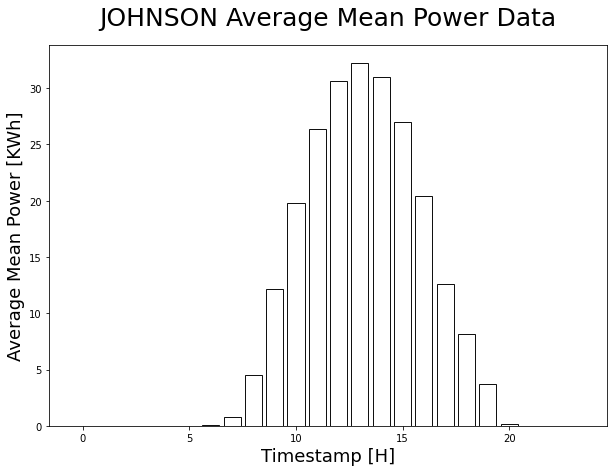

In [32]:
fig=plt.figure()

plt.figure(figsize=(10,7))
plt.bar(x=x_data_df, height=y_data_df,color='white', edgecolor='#111111')
plt.title("JOHNSON Average Mean Power Data", fontsize=25, pad=20)
plt.xlabel('Timestamp [H]', fontsize=18)
plt.ylabel('Average Mean Power [KWh]', fontsize=18)
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KWh'))
# plt.fill_between(x_data_df, y_data_df,color='#000000')
# plt.figure(figsize=(5, 5))


plt.show()

In [33]:
std_df = final_df.groupby([final_df['timestamp'].dt.time])['mean_power'].std()

In [37]:
std_df

timestamp
00:00:00        0.000000
01:00:00        0.000000
02:00:00        0.000000
03:00:00        0.000000
04:00:00        0.000000
05:00:00             NaN
06:00:00      128.902688
07:00:00      772.820909
08:00:00     2796.011445
09:00:00     4897.048252
10:00:00     6639.720713
11:00:00     8014.859096
12:00:00     9176.161208
13:00:00     9857.782256
14:00:00    10168.613918
15:00:00    10517.485378
16:00:00    10829.783512
17:00:00     9831.566370
18:00:00     5922.596003
19:00:00     1639.595242
20:00:00      292.538621
21:00:00        0.000000
22:00:00        0.000000
23:00:00        0.000000
Name: mean_power, dtype: float64

In [34]:
std_list = []
for i in std_df:
    if str(i) == 'nan':
        i = 0.0
    std_list.append(float(i/1000))

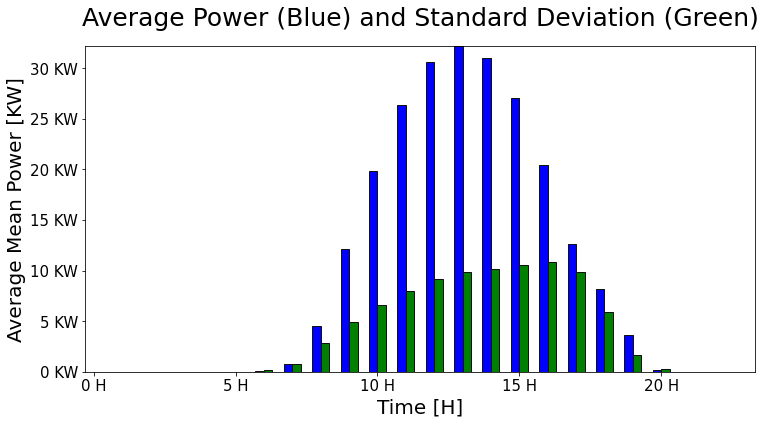

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
labels = x_data_df
avg_data = y_data_df
std_data = std_list

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

# fig, ax = plt.subplots()
plt.bar(x - width/2, avg_data, width, color='blue', edgecolor='#111111', label='Average Mean Power [KW]')
plt.bar(x + width/2, std_data, width, color='green', edgecolor='#111111', label='Standard Deviation')

plt.xlabel('Time [H]', fontsize=20)
plt.ylabel('Average Mean Power [KW]', fontsize=20)
plt.title("Average Power (Blue) and Standard Deviation (Green)", fontsize=25, pad=20)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KW'))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.margins(x=0)
plt.margins(y=0)
# plt.legend()

plt.show()